In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta

## Data Import
All necessary file links and merged data can be accessed through the TSD.py file

In [2]:
import TSD

### Initial Look at Data
A quick print out of the merged data reveals the following:

In [3]:
merged_df = TSD.merged_df
merged_df


,id,dob,gender,city,colonia,state_x,id_x,timein,timeout,state_y,clinic_id,patient_id,id_y,location,start,end
0,1,2005-08-09,f,punta colonet,NaN,BC,588,2021-05-07 09:44:49.715394,2021-05-07 09:44:49.715421,i,15,1,15,Thousand Smiles Ensenada,2021-05-01,2021-05-11
1,1,2005-08-09,f,punta colonet,NaN,BC,607,2021-08-06 09:47:35.775716,2021-08-06 09:47:35.775741,i,16,1,16,Thousand Smiles Ensenada,2021-08-01,2021-08-08
2,1,2005-08-09,f,punta colonet,NaN,BC,733,2022-05-06 10:01:49.350689,2022-05-06 10:01:49.350714,i,23,1,23,Ensenada,2022-05-06,2022-05-08
3,1,2005-08-09,f,punta colonet,NaN,BC,1049,2022-11-04 10:19:36.302828,2022-11-04 10:19:36.302844,i,25,1,25,Ensenada,2022-11-04,2022-11-06
4,1,2005-08-09,f,punta colonet,NaN,BC,1153,2023-02-03 08:59:22.584125,2023-02-03 08:59:22.584141,i,30,1,30,Ensenada,2023-02-03,2023-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,717,1991-06-02,f,Ensenada,Comunidad Indigena,BC,1319,2023-04-01 10:18:19.003334,2023-04-01 10:18:19.003350,i,34,717,34,Ensenada,2023-03-30,2023-04-03
741,718,1990-08-13,m,Ensenada,Com. Indigena,BC,1320,2023-04-01 10:24:41.717491,2023-04-01 10:24:41.717507,i,34,718,34,Ensenada,2023-03-30,2023-04-03
742,719,1989-11-08,f,Ensenada,Com.Indigena,BC,1321,2023-04-01 10:54:06.016797,2023-04-01 10:54:06.016812,i,34,719,34,Ensenada,2023-03-30,2023-04-03
743,720,2017-02-01,f,Ensenada,Com.Indigena,BC,1322,2023-04-01 11:00:04.252226,2023-04-01 11:00:04.252241,i,34,720,34,Ensenada,2023-03-30,2023-04-03


### Basic Stats - Population
Some basic charts showing the makeup of the population using Thousand Smiles Clinics in the given time period.

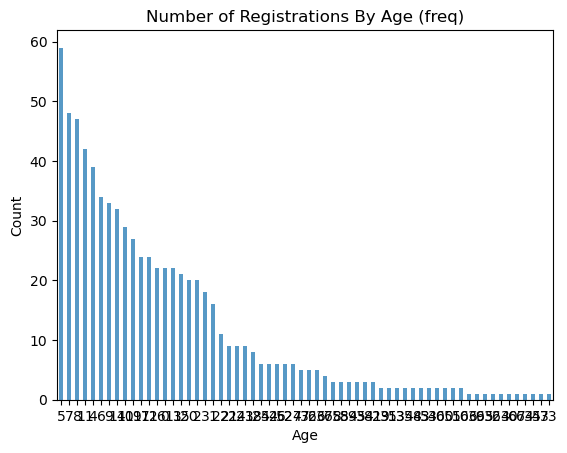

In [4]:
def compute_age(row):
    d1 = datetime.strptime(row["start"], "%Y-%m-%d")
    d2 = datetime.strptime(row["dob"], "%Y-%m-%d")
    diff_in_years = relativedelta(d1, d2)
    return diff_in_years.years

merged_df["age_in_years"] = merged_df.apply(lambda row: compute_age(row), axis=1)

merged_df['age_in_years'].value_counts().plot(kind='bar', alpha=0.75, rot=0)
plt.title("Number of Registrations By Age (freq)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

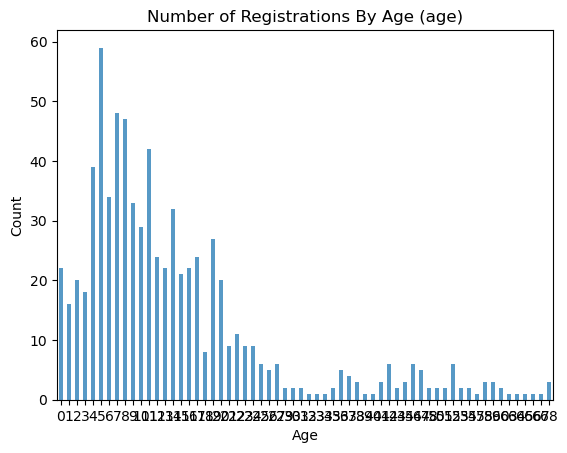

In [5]:
merged_df['age_in_years'].value_counts().sort_index().plot(kind='bar', alpha=0.75, rot=0)
plt.title("Number of Registrations By Age (age)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

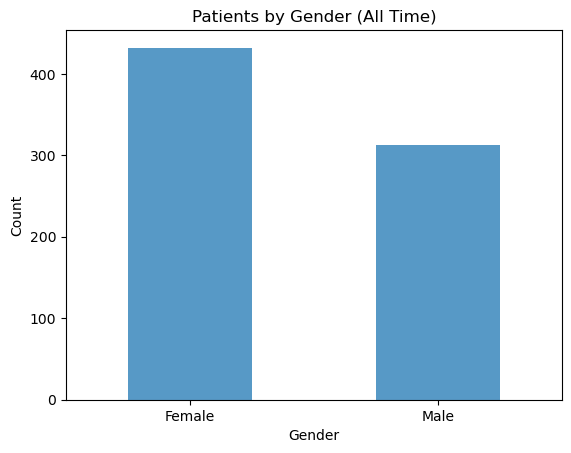

In [6]:
di = {'m': "Male", 'f': "Female"}
merged_df = merged_df.replace({"gender": di})

merged_df['gender'].value_counts().plot(kind='bar', alpha=0.75, rot=0)
plt.title("Patients by Gender (All Time)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

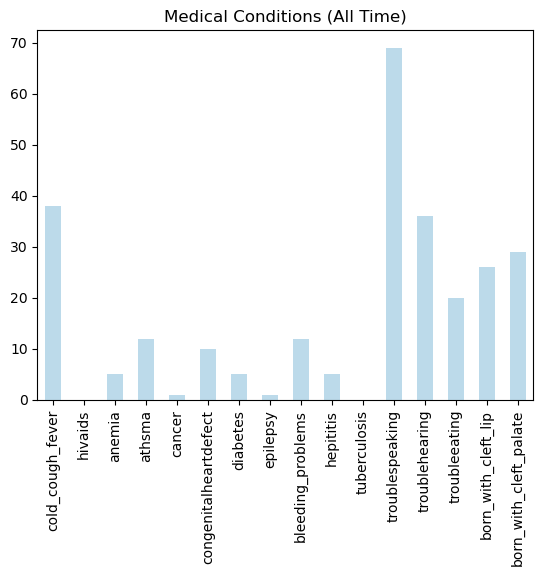

In [7]:
med_df = TSD.medical_df[["cold_cough_fever", "hivaids", "anemia", "athsma", "cancer", "congenitalheartdefect", "diabetes", "epilepsy", "bleeding_problems", "hepititis", "tuberculosis", "troublespeaking", "troublehearing", "troubleeating", "born_with_cleft_lip", "born_with_cleft_palate"]].sum()


med_df.plot(kind='bar', alpha=0.75, colormap="Paired", stacked=True) 
#plt.legend(["cold_cough_fever", "hivaids", "anemia", "athsma", "cancer", "congenitalheartdefect", "diabetes", "epilepsy", "bleeding_problems", "hepititis", "tuberculosis", "troublespeaking", "troublehearing", "troubleeating", "born_with_cleft_lip", "born_with_cleft_palate"])
plt.title("Medical Conditions (All Time)")
plt.show()

In [8]:
merged_df.describe()

,id,id_x,clinic_id,patient_id,id_y,age_in_years
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,438.540940,951.000000,24.868456,438.540940,24.868456,14.542282
std,175.678497,215.207264,4.776048,175.678497,4.776048,13.320537
min,1.000000,579.000000,14.000000,1.000000,14.000000,0.000000
25%,343.000000,765.000000,23.000000,343.000000,23.000000,6.000000
50%,440.000000,951.000000,25.000000,440.000000,25.000000,11.000000
75%,582.000000,1137.000000,30.000000,582.000000,30.000000,18.000000
max,721.000000,1323.000000,34.000000,721.000000,34.000000,68.000000


### Basic Stats - Clinics

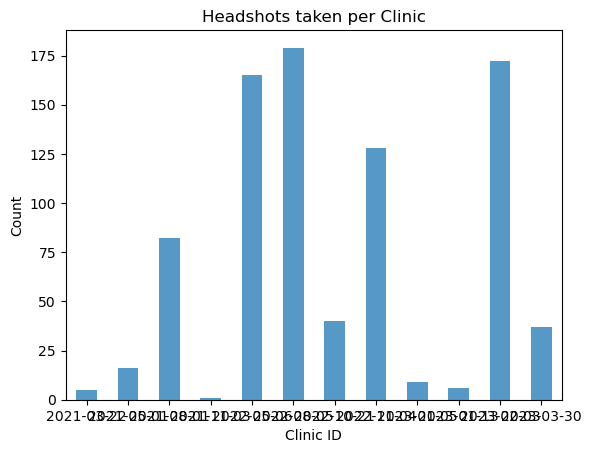

In [9]:
TSD.headshot_df['clinic_id'].value_counts().sort_index().plot(kind='bar', alpha=0.75, rot=0)
plt.title("Headshots taken per Clinic")
plt.xlabel("Clinic ID")
plt.ylabel("Count")
plt.show()

### Information on the Data
The following gives information on the data itself.

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 0 to 744
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            745 non-null    int64 
 1   dob           745 non-null    object
 2   gender        745 non-null    object
 3   city          708 non-null    object
 4   colonia       669 non-null    object
 5   state_x       745 non-null    object
 6   id_x          745 non-null    int64 
 7   timein        745 non-null    object
 8   timeout       745 non-null    object
 9   state_y       745 non-null    object
 10  clinic_id     745 non-null    int64 
 11  patient_id    745 non-null    int64 
 12  id_y          745 non-null    int64 
 13  location      745 non-null    object
 14  start         745 non-null    object
 15  end           745 non-null    object
 16  age_in_years  745 non-null    int64 
dtypes: int64(6), object(11)
memory usage: 104.8+ KB


In [11]:
merged_df.nunique()

id              445
dob             429
gender            2
city             55
colonia         284
state_x           3
id_x            745
timein          745
timeout         745
state_y           1
clinic_id        12
patient_id      445
id_y             12
location          2
start            12
end              12
age_in_years     62
dtype: int64

#### Potential Problems
Are there any missing values?

In [12]:
merged_df.isna().sum()

id               0
dob              0
gender           0
city            37
colonia         76
state_x          0
id_x             0
timein           0
timeout          0
state_y          0
clinic_id        0
patient_id       0
id_y             0
location         0
start            0
end              0
age_in_years     0
dtype: int64

Are there any duplicate values? (id_x represents unique visit)

In [13]:
merged_df.duplicated(subset=['id_x']).sum()

0